Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

Load the tips dataset from either pydataset or seaborn.

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:


from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
Modify and add to the code above as necessary for it to work with the tips dataset.

Plot the residuals for the linear regression model that you made.

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

What is the amount of variance explained in your model?

Is your model better than the baseline model?

Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot
regression_errors(y, yhat): returns the following values:
sum of squared errors (SSE)
explained sum of squares (ESS)
total sum of squares (TSS)
mean squared error (MSE)
root mean squared error (RMSE)
baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from math import sqrt
import evaluate
from IPython.display import display, HTML

In [2]:
df= data('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
#baseline
df['yhat_baseline'] = df['tip'].mean()

In [5]:
#asigne values to my X and y
X = df[['total_bill']]
y = df['tip']

In [6]:
#create a model
model = LinearRegression().fit(X, y)
#model = LinearRegression().fit(df[['total_bill']], df['tip'])

In [7]:
# compute predictions and add to original dataframe
df['yhat']= model.predict(X)

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


In [9]:
# compute residuals
#df['residual'] = df['yhat'] - df['y']
# y = df['tip']

df['residuals'] = df['yhat'] - df['tip']
df['residuals_baseline'] = df ['yhat_baseline'] - df['tip']

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residuals,residuals_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721


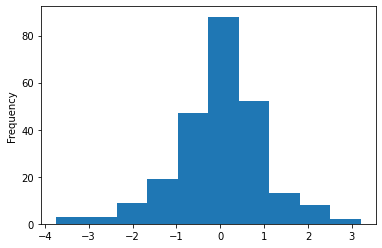

In [11]:
df.residuals.plot.hist()
plt.show()

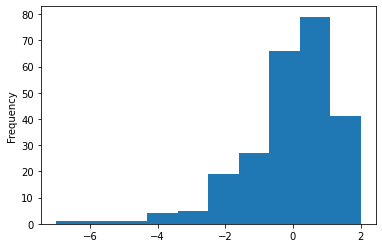

In [12]:
df.residuals_baseline.plot.hist()
plt.show()

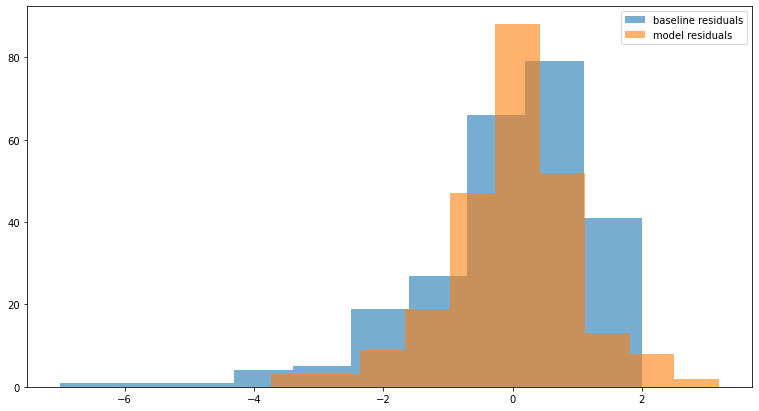

In [13]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.hist(df.residuals_baseline, label='baseline residuals', alpha=.6)
ax.hist(df.residuals, label='model residuals', alpha=.6)
ax.legend()
plt.show()

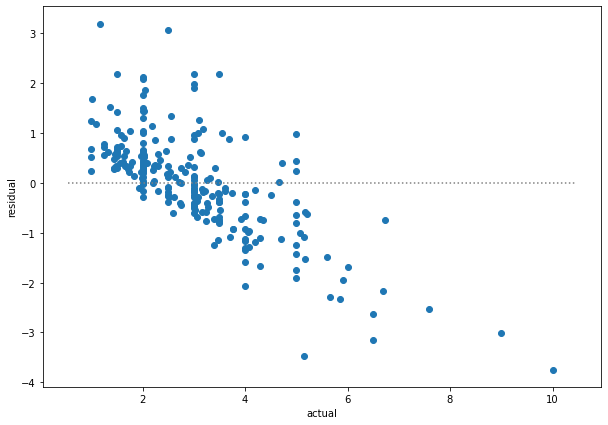

In [14]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(df.tip, df.residuals)
ax.set(ylabel='residual', xlabel='actual')
ax.hlines(0, *ax.get_xlim(), ls=':', color='gray')
plt.show()

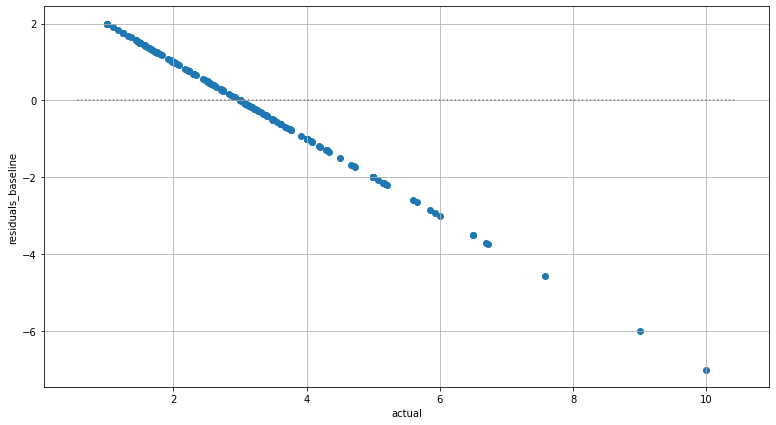

In [15]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.scatter(df.tip, df.residuals_baseline)
ax.set(ylabel='residuals_baseline', xlabel='actual')
ax.hlines(0, *ax.get_xlim(), ls=':', color='gray')
ax.grid()

In [16]:
#calculate manually 
# square each residual value
df['residual^2'] = df.residuals ** 2

df['residuals_baseline^2'] = df.residuals_baseline ** 2

df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residuals,residuals_baseline,residual^2,residuals_baseline^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721,0.139252,0.251724


In [17]:
# SSE
SSE = sum(df['residual^2'])
SSE_baseline = sum(df['residuals_baseline^2'])

print("SSE = ", SSE)
print("SSE  baseline = ", SSE_baseline)

SSE =  252.78874385077597
SSE  baseline =  465.21247704918085


In [18]:
#calculate SSE using sklearn
SSE2 = mean_squared_error(df.tip, df.yhat)*len(df)
SSE2_baseline = mean_squared_error(df.tip, df.yhat_baseline)*len(df)
print("SSE2 = ", SSE2)
print("SSE2  baseline = ", SSE2_baseline) 

SSE2 =  252.788743850776
SSE2  baseline =  465.2124770491804


In [19]:
#Total Sum of Squares (TSS) is the sum of difference between 
#the actual final grade and the mean of all final grades. 
#It can also be derived by summing the ESS and SSE.
ess = ((df.yhat - df.tip.mean())**2).sum()
tss = ((df.tip - df.tip.mean())**2).sum()

ess / tss

0.45661658635167607

In [20]:
print("SSE manual == SSE sklearn: ", round (SSE,2) == round(SSE2,2)) 
print("SSE manual - baseline == SSE sklearn - baseline: ", round(SSE_baseline,2) == round (SSE2_baseline,2))

SSE manual == SSE sklearn:  True
SSE manual - baseline == SSE sklearn - baseline:  True


In [23]:
#We arrive at this by dividing your SSE by the total number of data points, i.e. the average of your errors that have each been squared. 
#If outliers don't matter as much, but cost exponential instead of linear, 
#then this is a good metric to use. That means that a residual of 10 (the expected value is 10 units off the actual value) is greater than twice a residual of 5

In [22]:
#calculate manually 
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  1.0360194420113769
MSE baseline =  1.9066085124966428


In [24]:
# use sklearn
MSE2 = mean_squared_error(df.tip, df.yhat)

MSE2_baseline = mean_squared_error(df.tip, df.yhat_baseline)
print("MSE = ", MSE2)
print("MSE baseline = ", MSE_baseline)

MSE =  1.036019442011377
MSE baseline =  1.9066085124966428


In [25]:
print("MSE manual == MSE sklearn: ", round(MSE,3) == round( MSE2,3)) 
print("MSE manual  baseline == MSE sklearn baseline: ", round(MSE_baseline,3) == round(MSE2_baseline,3)) 

MSE manual == MSE sklearn:  True
MSE manual  baseline == MSE sklearn baseline:  True


In [26]:
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  1.0178504025697377
RMSE baseline =  1.3807999538298958


In [27]:
df['residuals_baseline^2'] = df.residuals_baseline ** 2
SSE_baseline = sum(df['residuals_baseline^2'])

print("SSE  baseline = ", SSE_baseline)

SSE  baseline =  465.21247704918085


In [28]:
ess_b = ((df.yhat_baseline - df.tip.mean())**2).sum()
tss_b = ((df.tip - df.tip.mean())**2).sum()


ess_b / tss_b

0.0

In [29]:
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE baseline = ", RMSE_baseline)

RMSE baseline =  1.3807999538298958


In [30]:
if SSE < SSE_baseline :
    print (" Your model perfomed better that baseline")
else: 
    print ("your model performed bellow the baseline")

 Your model perfomed better that baseline


In [31]:
r2_score(df.tip, df.yhat)

0.45661658635167657

In [32]:
explained_variance_score(df.tip, df.yhat)

0.4566165863516767

In [33]:
def plot_residuals ( df, y, yhat ):
    '''
    Takes in a dataframe , y = column with actual_values and yhat= name of the columns with predicted_values
    and creates a residual plot
    
    Example:
    plot_residuals(df, 'tip', 'yhat')
    '''


    
    #baseline
    df['yhat_baseline'] = df[y].mean()


    # residuals
    df['residuals'] = df[yhat] - df[y]
    df['residuals_baseline'] = df ['yhat_baseline'] - df[y]

    # plot
    fig, ax = plt.subplots(figsize=(13, 7))
    ax.hist(df.residuals_baseline, label='baseline residuals', alpha=.6)
    ax.hist(df.residuals, label='model residuals', alpha=.6)
    ax.legend()
    plt.show()
    return

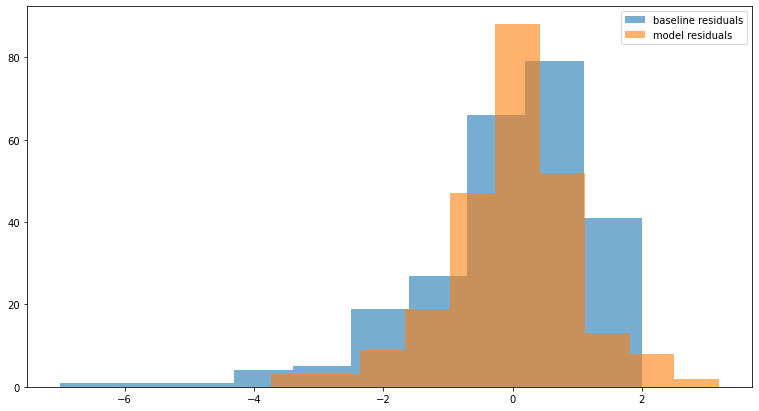

In [34]:
plot_residuals(df, 'tip', 'yhat')

In [35]:
def plot_residuals2(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

<AxesSubplot:title={'center':'Actual vs Residual'}, xlabel='actual value ($y$)', ylabel='residual ($y - \\hat{y}$)'>

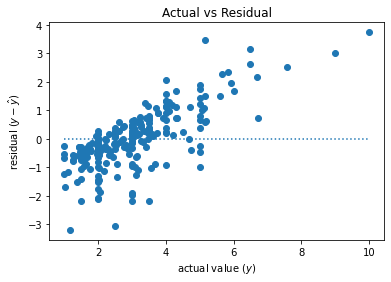

In [36]:
plot_residuals2( df['tip'], df['yhat'])

In [37]:
def regression_errors(df, y, yhat):
    '''
    Takes in a dataframe , y = column with actual_values and yhat= name of the columns with predicted_values
    and calculate:
    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)
    
    Example:
    plot_residuals(df, 'tip', 'yhat')
    '''
    #import
    from sklearn.metrics import  mean_squared_error
    from math import sqrt
    
    
    #calculate SSE using sklearn
    SSE = mean_squared_error(df[y], df[yhat])*len(df)
    #explained sum of squares (ESS)
    ESS = ((df[yhat] - df[y].mean())**2).sum()
    #total sum of squares (TSS)
    TSS = ((df[y] - df[y].mean())**2).sum()
    #mean squared error (MSE)
    MSE = mean_squared_error(df[y], df[yhat])
    #root mean squared error (RMSE)
    RMSE = sqrt(MSE)
    
    #create a dictionary
    m= {
        'sse': SSE,
        'ess': ESS,
        'rmse': RMSE,
        'tss': TSS,
        'mse': MSE,
        'r2': ESS/TSS,
    }

    return m

In [45]:
def baseline_mean_errors(df, y):
    '''
    Takes in a dataframe , y = column with actual_values 
    and calculate:
    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)

    Example:
    plot_residuals(df, 'tip')
    '''
    #import
    from sklearn.metrics import  mean_squared_error
    from math import sqrt

    #baseline
    df['yhat_baseline'] = df[y].mean()

    #calculate SSE using sklearn
    SSE_baseline = mean_squared_error(df[y], df['yhat_baseline'])*len(df)
    #explained sum of squares (ESS)
    ESS_b = ((df.yhat_baseline - df[y].mean())**2).sum()
    #total sum of squares (TSS)
    TSS_b = ((df[y] - df[y].mean())**2).sum()
    #mean squared error (MSE)
    MSE_baseline = mean_squared_error(df[y], df.yhat_baseline)
    #root mean squared error (RMSE)
    RMSE_baseline = sqrt(MSE_baseline)
    
    #create dicc
    b ={
        'sse': SSE_baseline,
        'mse': MSE_baseline,
        'rmse': RMSE_baseline,
         'tss': TSS_b,
        'ess' : ESS_b,
        'mse': MSE_baseline,
        'r2': ESS_b/TSS_b,       
    }

    return b

In [46]:
r = baseline_mean_errors(df,'tip')

In [43]:
def better_than_baseline(df, y, yhat):
    '''
    Takes in a df, column with actual values,  and predicted values
    and returns true if your model performs better than the baseline, otherwise false
    '''    
    from IPython.display import display, HTML
    #baseline 
    b = baseline_mean_errors(df,y)
    #Model
    m = regression_errors(df, y, yhat)
    
    df1 = pd.DataFrame(m, index= ['model'])
    df2 =pd.DataFrame(r, index= ['baseline'])
    table =pd.concat([df2, df1]).T
    display(HTML(table.to_html()))
    print('   ')

    if m['rmse']< b['rmse']:
        print ('Model performs better than the baseline: ',m['rmse']< b['rmse'] )
    else:
        print ('Model performs better than the baseline: ',m['rmse']< b['rmse'] )
    
    return
    

In [47]:
better_than_baseline(df, 'tip', 'yhat')

,baseline,model
sse,465.212477,252.788744
mse,1.906609,1.036019
rmse,1.380800,1.017850
tss,465.212477,465.212477
ess,0.000000,212.423733
r2,0.000000,0.456617


   
Model performs better than the baseline:  True


In [48]:
mpg = data('mpg')

In [49]:
#baseline
mpg['yhat_baseline'] = mpg['hwy'].mean()

In [50]:
#create a model
#model = LinearRegression().fit(X, y)
model2 = LinearRegression().fit(mpg[['displ']], mpg['hwy'])

In [51]:
# compute predictions and add to original dataframe
mpg['yhat']= model2.predict(mpg[['displ']])

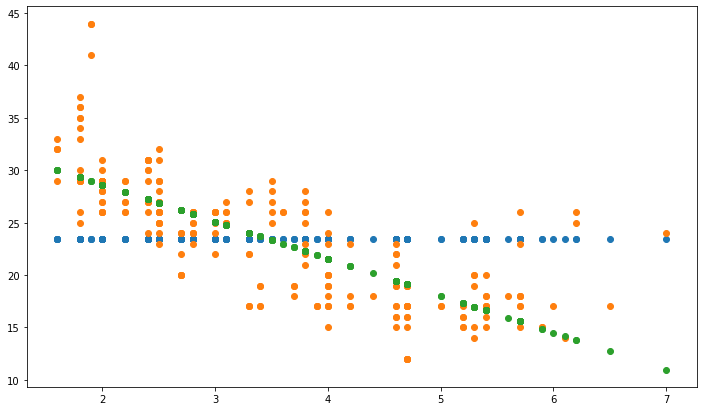

In [52]:
#plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(mpg.displ, mpg.yhat_baseline, label='baseline')
ax.scatter(mpg.displ, mpg.hwy, label='actual')
ax.scatter(mpg.displ, mpg.yhat, label='prediction')
plt.show()

In [53]:
evaluate.regression_errors(mpg, 'hwy', 'yhat')

{'sse': 3413.829008995467,
 'ess': 4847.833384166924,
 'rmse': 3.8195566312014524,
 'tss': 8261.66239316239,
 'mse': 14.589012858954987,
 'r2': 0.5867866723989038}

In [54]:
evaluate.better_than_baseline(mpg,'hwy', 'yhat')

,baseline,model
sse,8261.662393,3413.829009
mse,35.306250,14.589013
rmse,5.941906,3.819557
tss,8261.662393,8261.662393
ess,0.000000,4847.833384
r2,0.000000,0.586787


   
Model performs better than the baseline:  True


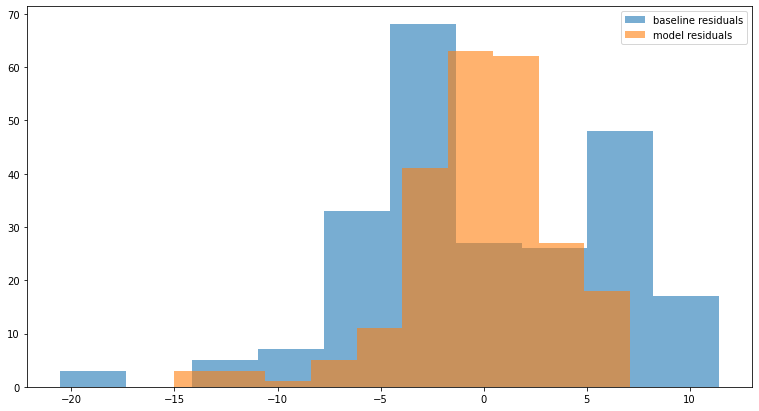

In [55]:
evaluate.plot_residuals(mpg,'hwy', 'yhat')

<AxesSubplot:title={'center':'Actual vs Residual'}, xlabel='actual value ($y$)', ylabel='residual ($y - \\hat{y}$)'>

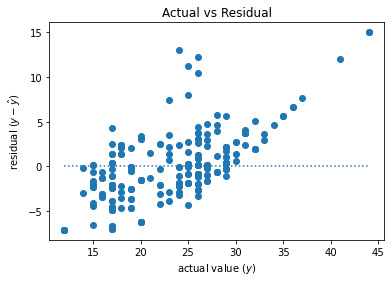

In [56]:
plot_residuals2(mpg['hwy'], mpg['yhat'])